<a href="https://colab.research.google.com/github/SHARKZTECH/INTRO-TO-ML/blob/main/cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'cirrhosis.csv'
cirrhosis_df = pd.read_csv(file_path)

# Display basic information about the dataset
cirrhosis_df.info()

# Display the first few rows of the dataset
cirrhosis_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# 2. Handling Missing Values

In [ ]:
# Check for missing values in the dataset
missing_values = cirrhosis_df.isnull().sum()

# Display the columns with missing values
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Impute missing numerical values with the median
# for column in cirrhosis_df.select_dtypes(include=['float64', 'int64']).columns:
#     cirrhosis_df[column].fillna(cirrhosis_df[column].median(), inplace=True)

# Impute missing categorical values with the mode
# for column in cirrhosis_df.select_dtypes(include=['object']).columns:
#     cirrhosis_df[column].fillna(cirrhosis_df[column].mode()[0], inplace=True)

cirrhosis_df.dropna(inplace=True)
# Verify that missing values have been handled
cirrhosis_df.isnull().sum()

Columns with missing values:
 Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


,0
ID,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0


In [ ]:
cirrhosis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombin    

# 3. Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in cirrhosis_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cirrhosis_df[column] = label_encoders[column].fit_transform(cirrhosis_df[column])

# Verify encoding
cirrhosis_df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
cirrhosis_df['Age'] = cirrhosis_df['Age'] / 365.25
cirrhosis_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58.765229,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,56.446270,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,70.072553,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,54.740589,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,38.105407,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# 4. Normalization/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
numerical_columns = cirrhosis_df.select_dtypes(include=['float64', 'int64']).columns

cirrhosis_df[numerical_columns] = scaler.fit_transform(cirrhosis_df[numerical_columns])

# Verify the scaling
cirrhosis_df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,-1.722640,-1.422207,1.179991,-1.014599,0.853538,-0.374828,3.677814,0.971423,1.565248,3.309769,2.431300,-0.470471,-2.269029,0.626861,-0.131941,0.244286,0.721609,-0.772071,1.455055,1.126335
1,-1.711711,2.270278,-0.907685,-1.014599,0.632769,-0.374828,-0.271901,0.971423,1.565248,-0.396098,-0.486355,-0.295529,1.542337,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,-0.046754
2,-1.700782,-0.871036,1.179991,-1.014599,1.930016,2.667892,-0.271901,-1.029418,-0.638877,1.456835,-0.421034,-0.833157,-0.091105,1.239740,-0.701166,-0.494890,-1.073906,-1.191607,1.256344,1.126335
3,-1.689852,-0.048783,1.179991,-1.014599,0.470385,-0.374828,-0.271901,0.971423,1.565248,1.456835,-0.333940,-0.543008,-2.417524,-0.417304,1.953545,-1.121379,-0.506093,-0.847372,-0.432701,1.126335
4,-1.678923,-0.427938,0.136153,0.985611,-1.113314,-0.374828,-0.271901,0.971423,1.565248,-0.396098,0.014437,-0.393667,0.032640,0.479316,-0.627763,-0.193744,-0.813019,-1.352966,0.163433,-0.046754


5. Save the Cleaned Data (Optional)

In [ ]:
cirrhosis_df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,-1.722640,-1.422207,1.179991,-1.014599,0.853538,-0.374828,3.677814,0.971423,1.565248,3.309769,2.431300,-0.470471,-2.269029,0.626861,-0.131941,0.244286,0.721609,-0.772071,1.455055,1.126335
1,-1.711711,2.270278,-0.907685,-1.014599,0.632769,-0.374828,-0.271901,0.971423,1.565248,-0.396098,-0.486355,-0.295529,1.542337,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,-0.046754
2,-1.700782,-0.871036,1.179991,-1.014599,1.930016,2.667892,-0.271901,-1.029418,-0.638877,1.456835,-0.421034,-0.833157,-0.091105,1.239740,-0.701166,-0.494890,-1.073906,-1.191607,1.256344,1.126335
3,-1.689852,-0.048783,1.179991,-1.014599,0.470385,-0.374828,-0.271901,0.971423,1.565248,1.456835,-0.333940,-0.543008,-2.417524,-0.417304,1.953545,-1.121379,-0.506093,-0.847372,-0.432701,1.126335
4,-1.678923,-0.427938,0.136153,0.985611,-1.113314,-0.374828,-0.271901,0.971423,1.565248,-0.396098,0.014437,-0.393667,0.032640,0.479316,-0.627763,-0.193744,-0.813019,-1.352966,0.163433,-0.046754


In [ ]:
# Save the cleaned and preprocessed dataset
cleaned_file_path = 'cleaned_cirrhosis.csv'
cirrhosis_df.to_csv(cleaned_file_path, index=False)


# 2. Data Visualization
2.1. Histograms of Continuous Variables

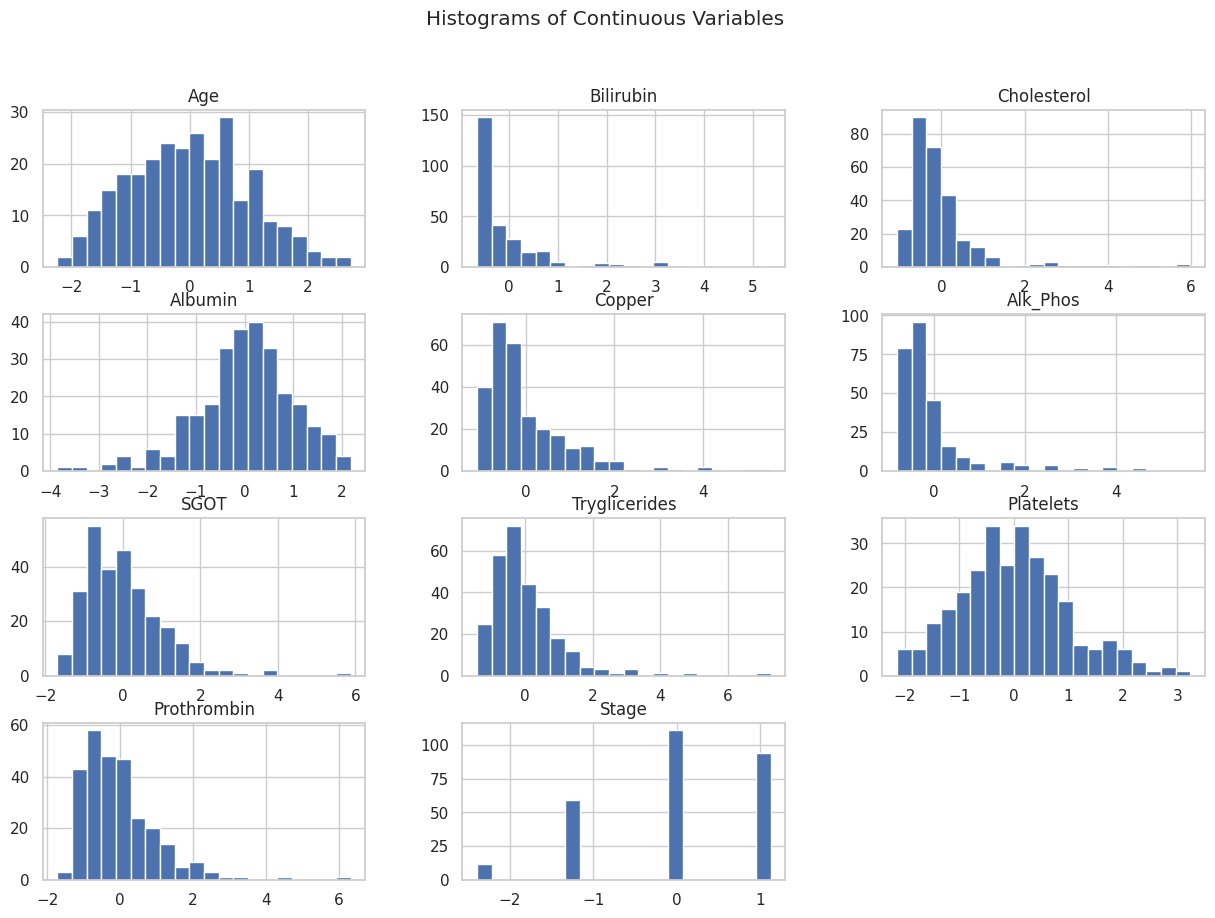

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Plot histograms
cirrhosis_df[continuous_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Continuous Variables")
plt.show()


# 2.2. Box Plots to Identify Outliers

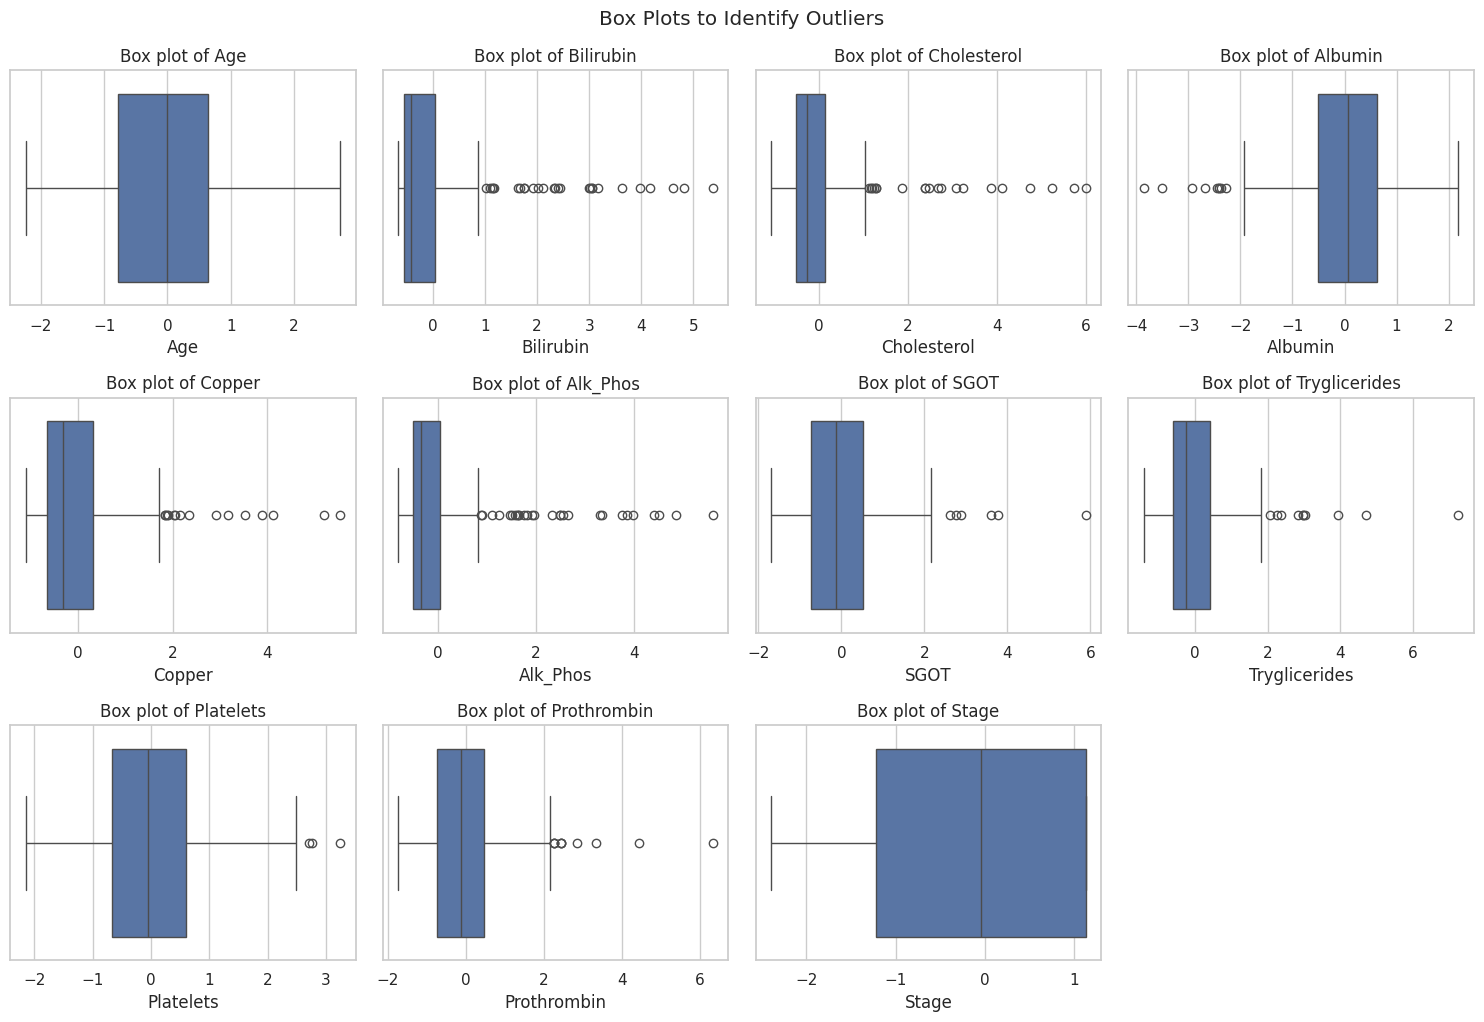

In [ ]:
# Create box plots for continuous variables
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=cirrhosis_df[var])
    plt.title(f'Box plot of {var}')

plt.tight_layout()
plt.suptitle("Box Plots to Identify Outliers", y=1.02)
plt.show()


# 2.3. Scatter Plots to Explore Relationships

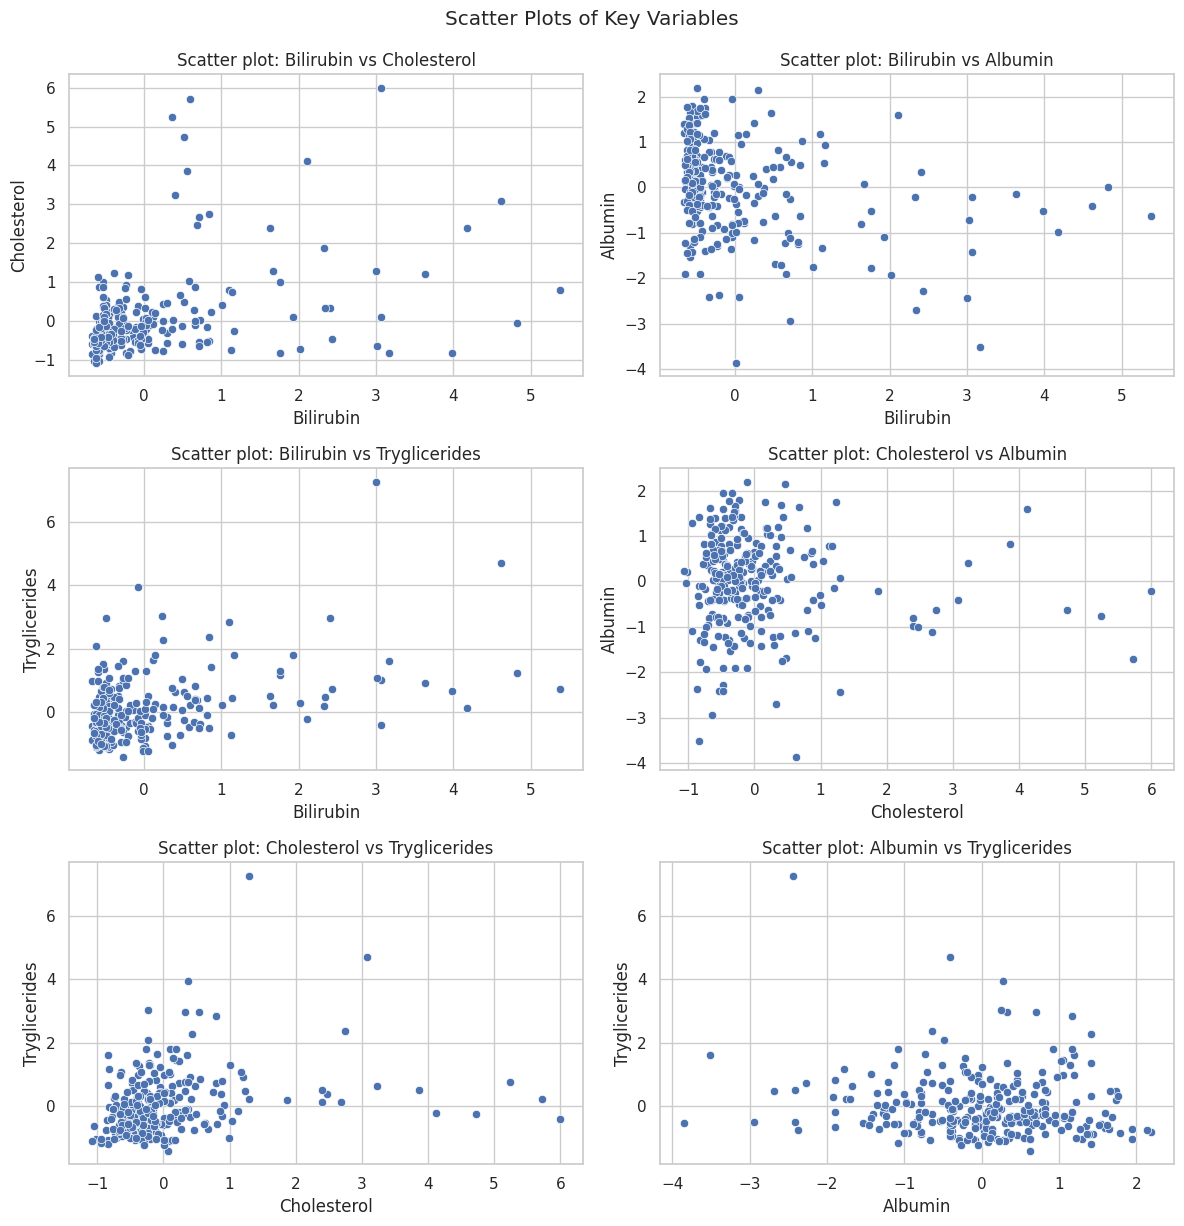

In [ ]:
# List of key variables for relationships
key_vars = ['Bilirubin', 'Cholesterol', 'Albumin', 'Tryglicerides']

# Calculate the number of scatter plots needed
num_plots = len(key_vars) * (len(key_vars) - 1) // 2

# Set up the grid dimensions for the plots
fig, axes = plt.subplots(nrows=num_plots//2, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots to explore relationships
plot_idx = 0
for i, var1 in enumerate(key_vars):
    for j, var2 in enumerate(key_vars):
        if i < j:  # Avoid repeating plots and self-plots
            sns.scatterplot(x=cirrhosis_df[var1], y=cirrhosis_df[var2], ax=axes[plot_idx])
            axes[plot_idx].set_title(f'Scatter plot: {var1} vs {var2}')
            plot_idx += 1

plt.tight_layout()
plt.suptitle("Scatter Plots of Key Variables", y=1.02)
plt.show()


# 3 data cleaning
done

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'cirrhosis.csv'
cirrhosis_df = pd.read_csv(file_path)

# Display basic information about the dataset
cirrhosis_df.info()

# Display the first few rows of the dataset
cirrhosis_df.head()

# Check for missing values in the dataset
missing_values = cirrhosis_df.isnull().sum()

# Display the columns with missing values
print("Columns with missing values:\n", missing_values[missing_values > 0])


cirrhosis_df.dropna(inplace=True)
# Verify that missing values have been handled
cirrhosis_df.isnull().sum()

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in cirrhosis_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cirrhosis_df[column] = label_encoders[column].fit_transform(cirrhosis_df[column])

# Verify encoding
cirrhosis_df.head()

cirrhosis_df['Age'] = cirrhosis_df['Age'] / 365.25
cirrhosis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58.765229,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,56.446270,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,70.072553,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,54.740589,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,38.105407,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# 4. statitics




# 1. Descriptive Statistics and Frequency Counts

In [ ]:
# Descriptive Statistics for numerical variables
descriptive_stats = cirrhosis_df.describe()

# Calculate the median for each numerical column
medians = cirrhosis_df.median()

# Display Descriptive Statistics
print("Descriptive Statistics (Mean, Std, Min, Max):\n", descriptive_stats)
print("\nMedians:\n", medians)

# Frequency Counts for categorical variables
categorical_columns = cirrhosis_df.select_dtypes(include=['int', 'object']).columns
for column in categorical_columns:
    frequency_counts = cirrhosis_df[column].value_counts()
    print(f"\nFrequency counts for {column}:\n", frequency_counts)


Descriptive Statistics (Mean, Std, Min, Max):
                ID       N_Days      Status        Drug         Age  \
count  276.000000   276.000000  276.000000  276.000000  276.000000   
mean   158.615942  1979.166667    0.869565    0.507246   49.799661   
std     91.662926  1112.380295    0.959743    0.500856   10.523082   
min      1.000000    41.000000    0.000000    0.000000   26.277892   
25%     79.750000  1185.750000    0.000000    0.000000   41.512663   
50%    157.500000  1788.000000    0.000000    1.000000   49.709788   
75%    240.250000  2689.750000    2.000000    1.000000   56.584531   
max    312.000000  4556.000000    2.000000    1.000000   78.439425   

              Sex     Ascites  Hepatomegaly     Spiders       Edema  \
count  276.000000  276.000000    276.000000  276.000000  276.000000   
mean     0.123188    0.068841      0.514493    0.289855    0.213768   
std      0.329250    0.253643      0.500698    0.454519    0.540665   
min      0.000000    0.000000      0.0

# 2. Correlation Analysis (Pearson Correlation Coefficient)


Pearson Correlation Matrix:
                      ID    N_Days    Status      Drug       Age       Sex  \
ID             1.000000 -0.402368 -0.418221 -0.041206 -0.098009 -0.058310   
N_Days        -0.402368  1.000000 -0.384526  0.019330 -0.143223 -0.029385   
Status        -0.418221 -0.384526  1.000000 -0.035851  0.225625  0.177618   
Drug          -0.041206  0.019330 -0.035851  1.000000 -0.128076 -0.071586   
Age           -0.098009 -0.143223  0.225625 -0.128076  1.000000  0.240648   
Sex           -0.058310 -0.029385  0.177618 -0.071586  0.240648  1.000000   
Ascites       -0.104589 -0.329450  0.290965 -0.046877  0.250940 -0.014830   
Hepatomegaly  -0.034106 -0.261022  0.291503  0.086582  0.080850  0.055305   
Spiders       -0.112879 -0.260605  0.228698 -0.009260 -0.004182 -0.142273   
Edema         -0.180306 -0.347114  0.327235 -0.052741  0.254105  0.014950   
Bilirubin     -0.092411 -0.430252  0.427397  0.080922  0.078177 -0.027474   
Cholesterol    0.028938 -0.136734  0.190461  0

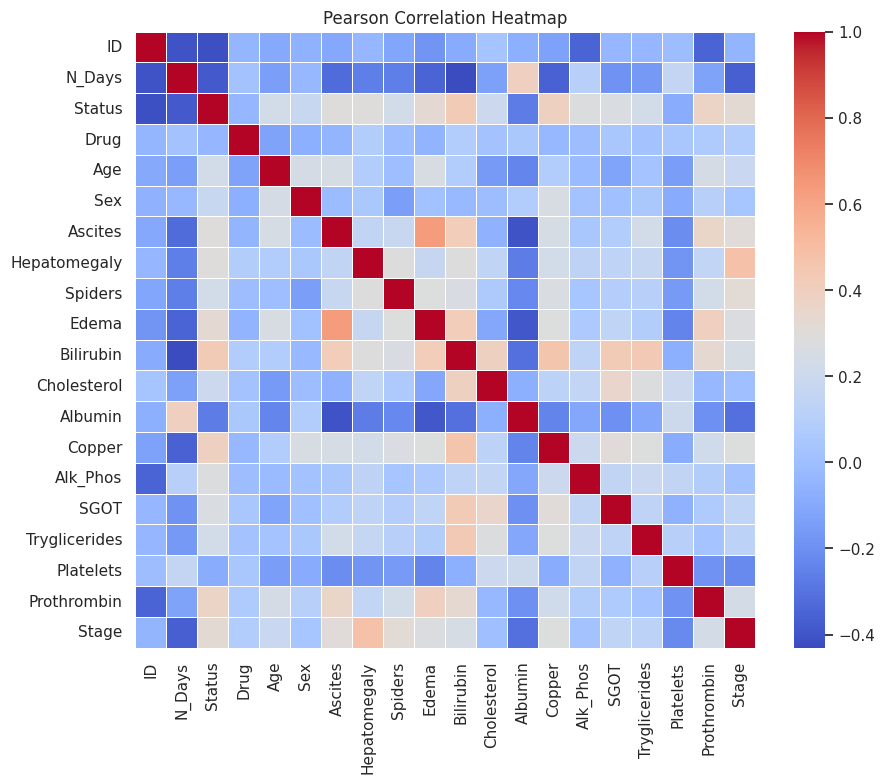

In [ ]:
# Calculate Pearson correlation coefficients between numerical variables
correlation_matrix = cirrhosis_df.corr(method='pearson')

# Display the correlation matrix
print("\nPearson Correlation Matrix:\n", correlation_matrix)

# Optionally, you can plot a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


# UML K-Custering

# 1. K-means Clustering Preparation (Elbow Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

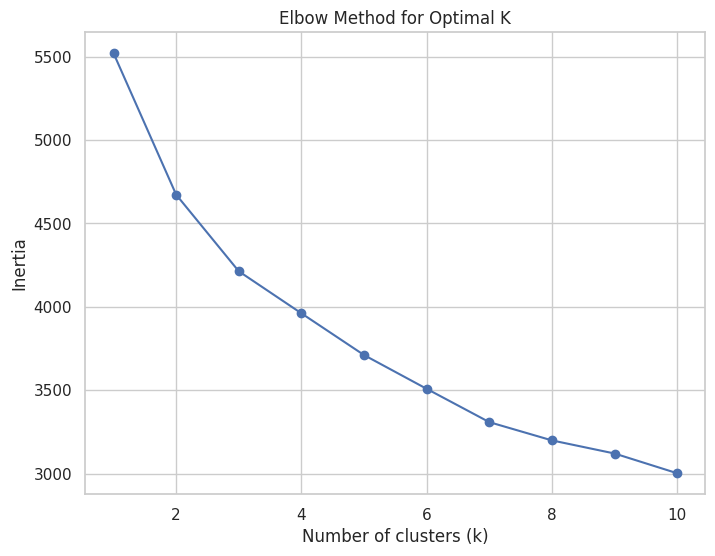

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ensure the data is standardized
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cirrhosis_df[numerical_columns])

# Elbow Method to find the optimal number of clusters
inertia = []  # List to store the inertia values for different 'k'

# Test KMeans for a range of cluster numbers (1-10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


# 2. Implement K-means Clustering

In [ ]:
# Based on the Elbow Method, choose the optimal number of clusters (replace 3 with your chosen 'k')
optimal_k =3  # Change based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit KMeans and predict the clusters
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
cirrhosis_df['Cluster'] = clusters

# Display the cluster centroids
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_columns)
print("Cluster Centroids:\n", cluster_centroids)


Cluster Centroids:
            ID       N_Days    Status      Drug        Age       Sex  \
0  120.720000   629.320000  1.840000  0.400000  58.351923  0.120000   
1  134.757009  1739.345794  1.579439  0.532710  51.459390  0.242991   
2  182.923611  2391.715278  0.173611  0.506944  47.081622  0.034722   

        Ascites  Hepatomegaly   Spiders     Edema  Bilirubin  Cholesterol  \
0  7.600000e-01      0.760000  0.680000  1.520000  10.936000   345.160000   
1 -4.163336e-17      0.757009  0.401869  0.130841   4.330841   459.682243   
2  6.938894e-17      0.291667  0.138889  0.048611   1.272917   310.090278   

    Albumin      Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  \
0  2.937200  192.440000  2311.624000  154.265200     172.560000  186.880000   
1  3.456075  139.579439  2754.523364  145.194299     133.682243  258.504673   
2  3.662569   56.013889  1378.751389  103.225625     110.250000  277.201389   

   Prothrombin     Stage  
0    12.152000  3.880000  
1    10.915888 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#3. Cluster Interpretation

Cluster Centroids (Original Scale):
    Cholesterol  Bilirubin   Albumin  Tryglicerides        SGOT   Platelets
0   301.366667   2.265833  3.402833     100.533333  123.976667  194.741667
1   338.967742   1.770968  3.716210     130.362903  107.334758  325.088710
2   758.500000  13.393750  3.171562     195.781250  189.693750  267.781250

Cluster Analysis by Categorical Variables:
            Status      Drug       Sex   Ascites  Hepatomegaly   Spiders  \
Cluster                                                                   
0        0.850000  0.491667  0.133333  0.083333      0.583333  0.333333   
1        0.653226  0.500000  0.137097  0.000000      0.370968  0.185484   
2        1.781250  0.593750  0.031250  0.281250      0.812500  0.531250   

            Edema  
Cluster            
0        0.258333  
1        0.056452  
2        0.656250  


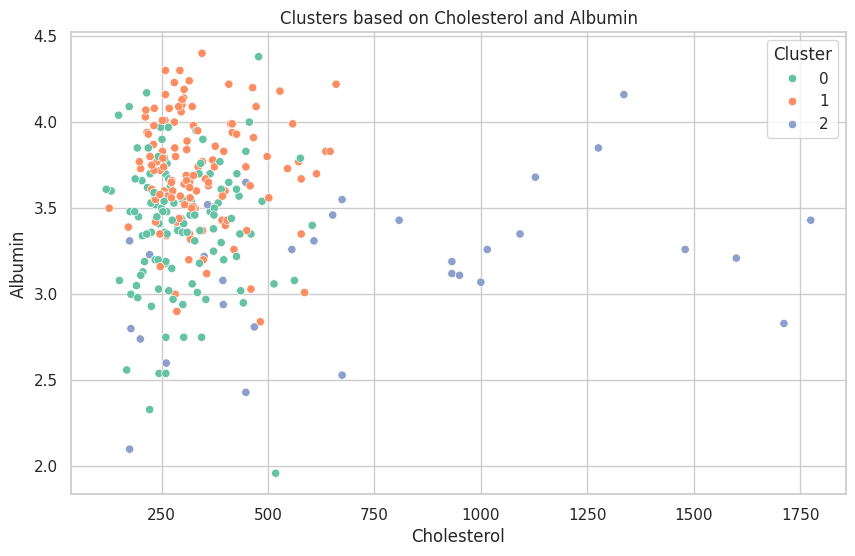

In [ ]:
# Analyze the cluster centroids to interpret the defining traits of each cluster
print("Cluster Centroids (Original Scale):\n", cluster_centroids)

# Explore how categorical variables like smoking vary across clusters
cluster_analysis = cirrhosis_df.groupby('Cluster')[categorical_columns].mean()
print("\nCluster Analysis by Categorical Variables:\n", cluster_analysis)

# You can also visualize how clusters differ based on certain key variables
import seaborn as sns

# Scatter plot showing clusters by two key variables (e.g., cholesterol and BMI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cirrhosis_df['Cholesterol'], y=cirrhosis_df['Albumin'], hue=cirrhosis_df['Cluster'], palette='Set2')
plt.title("Clusters based on Cholesterol and Albumin")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

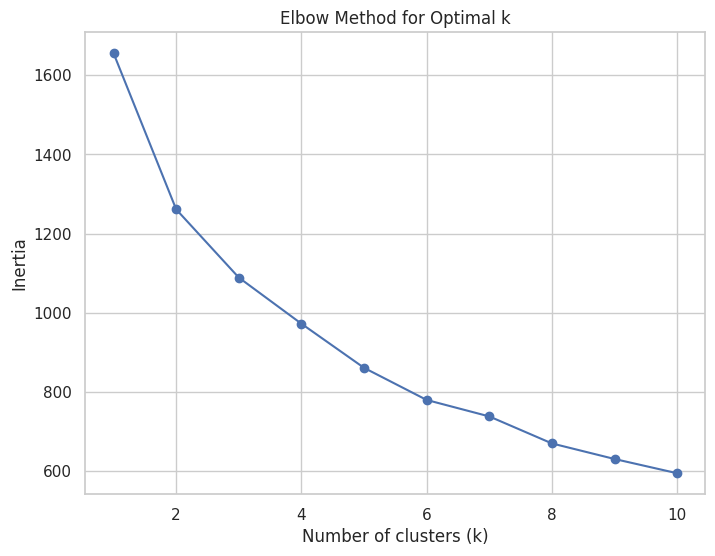

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


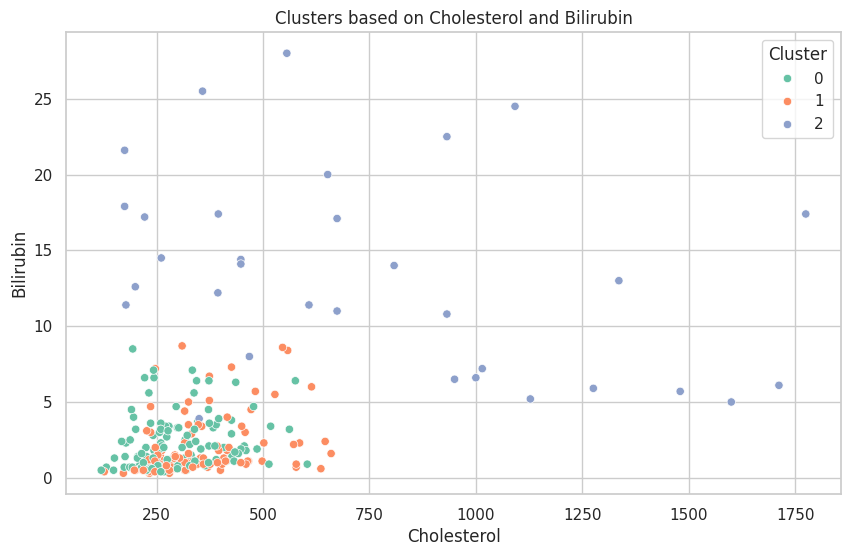

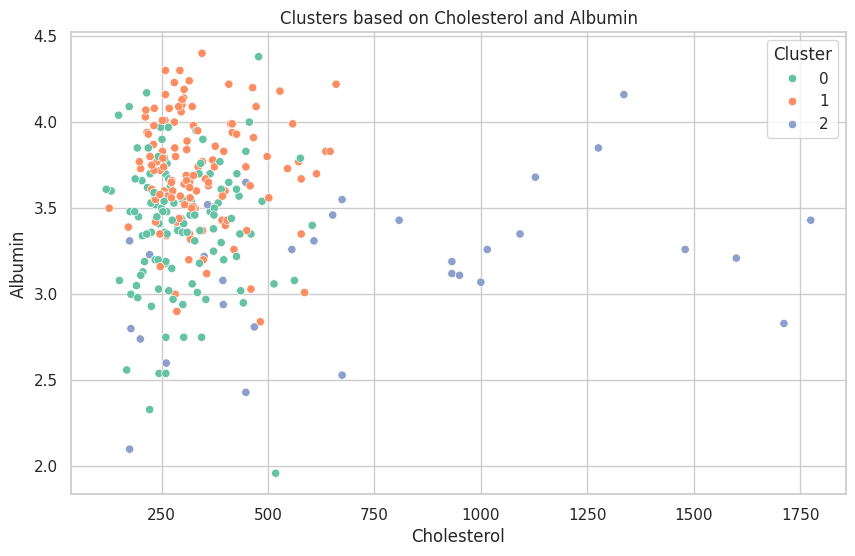

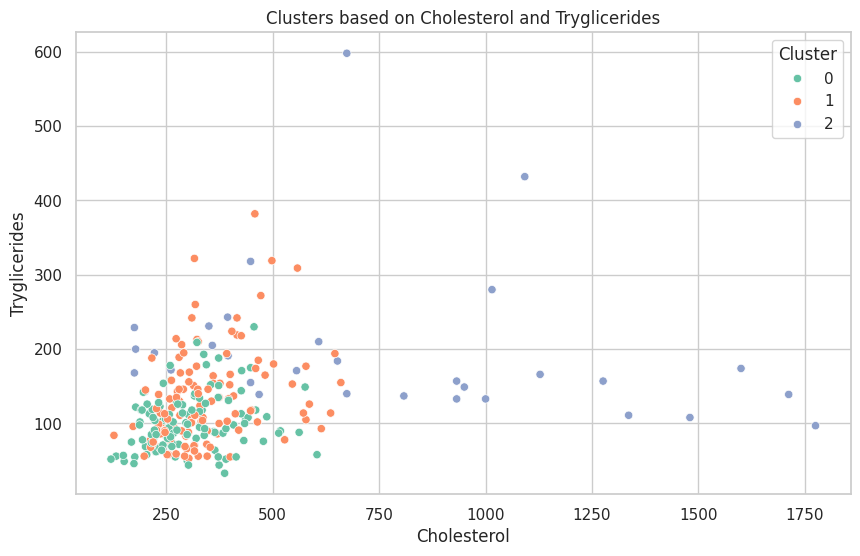

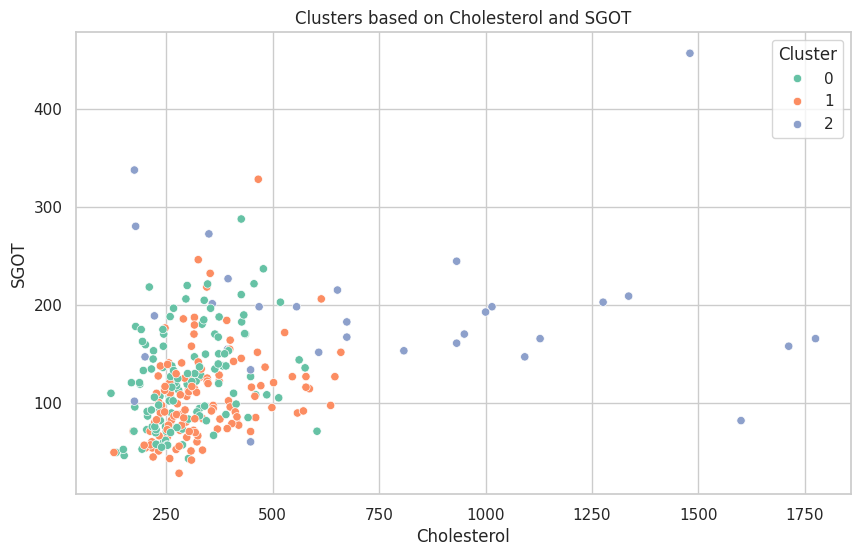

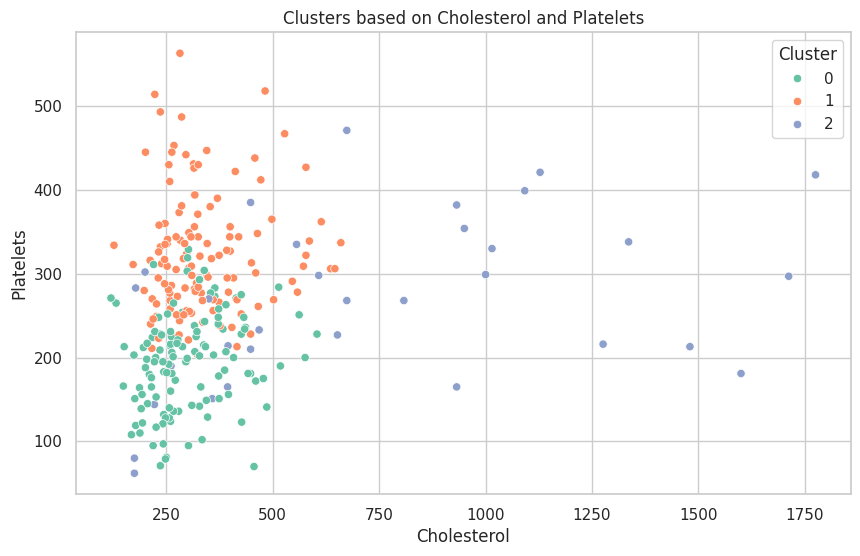

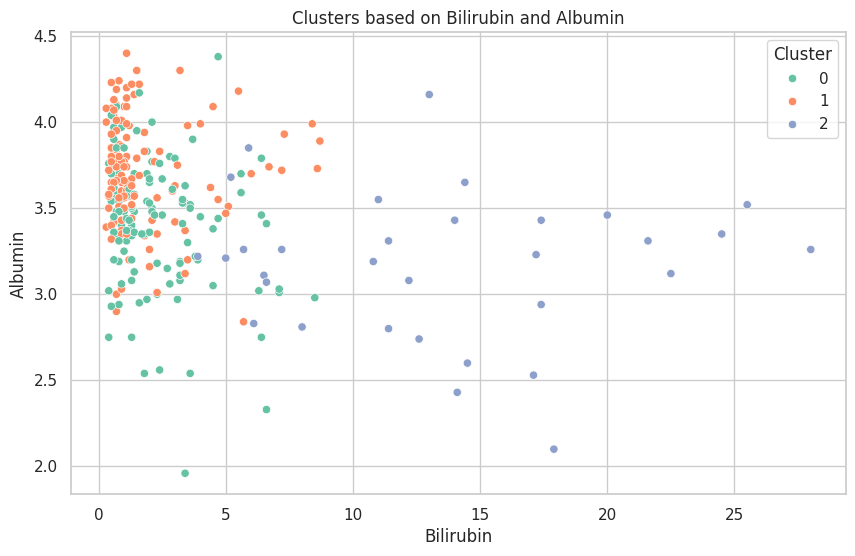

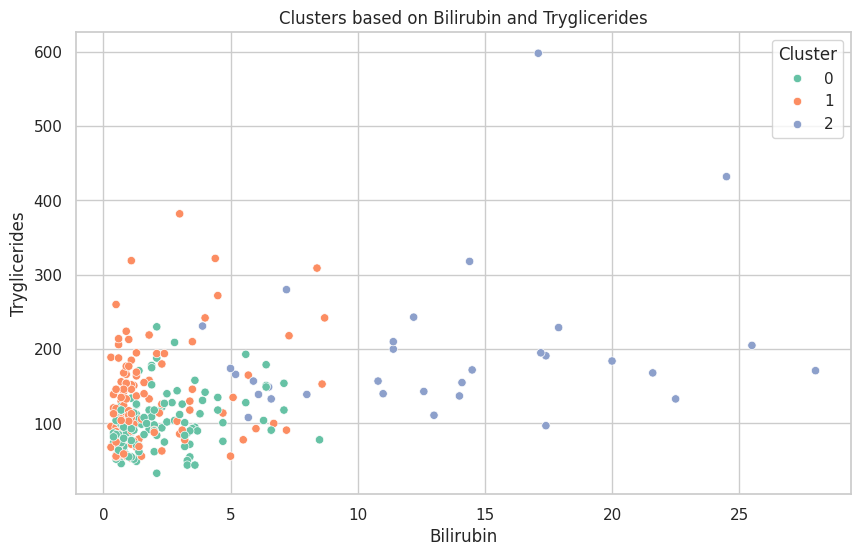

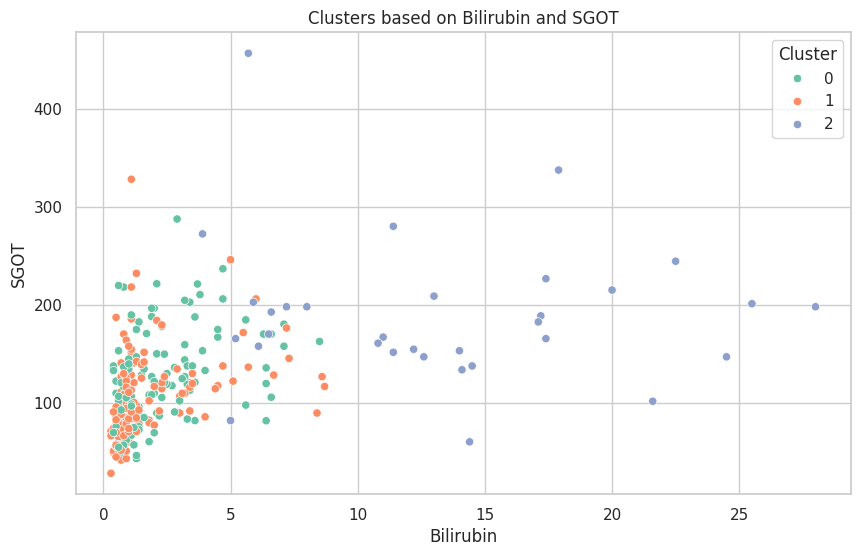

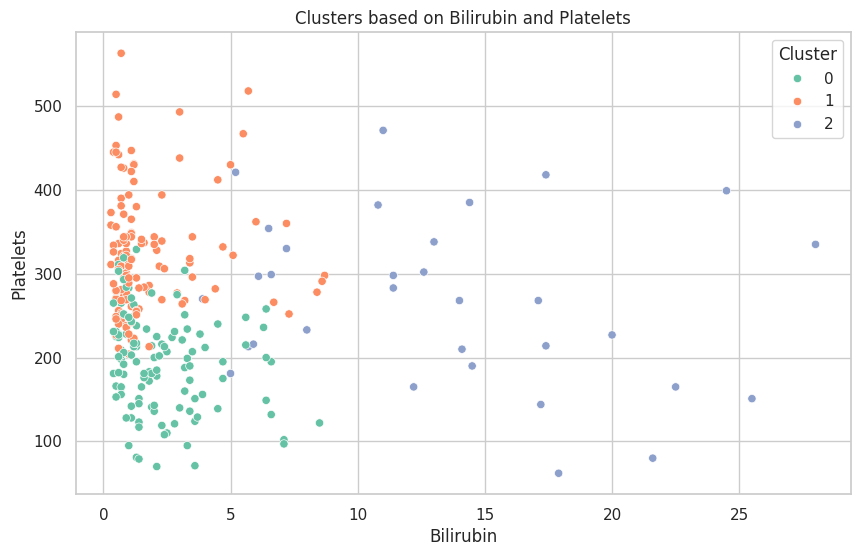

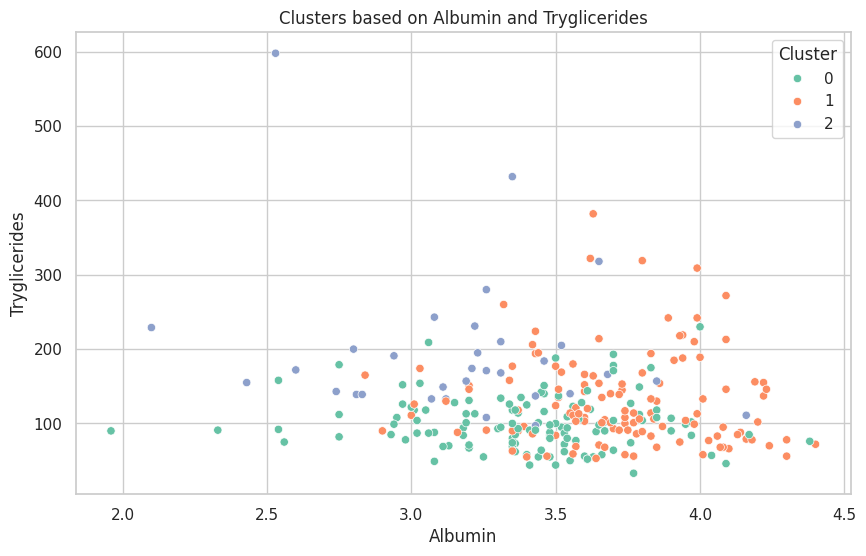

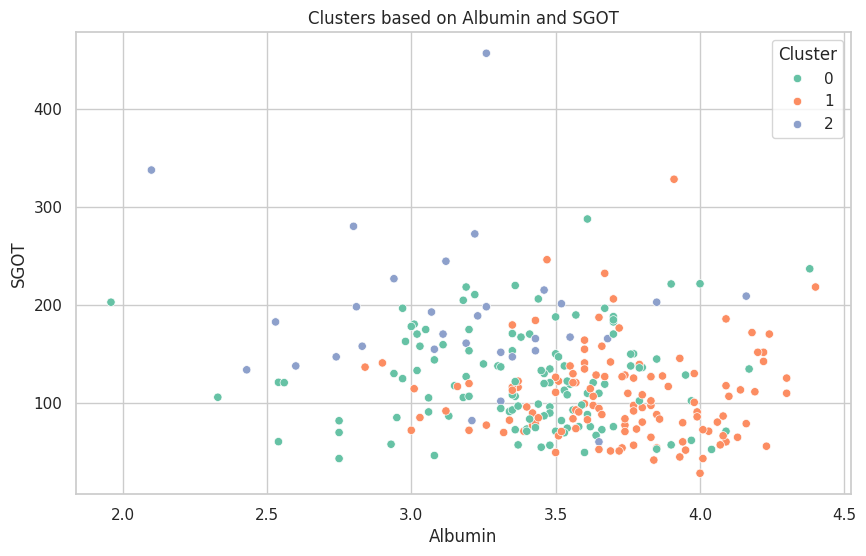

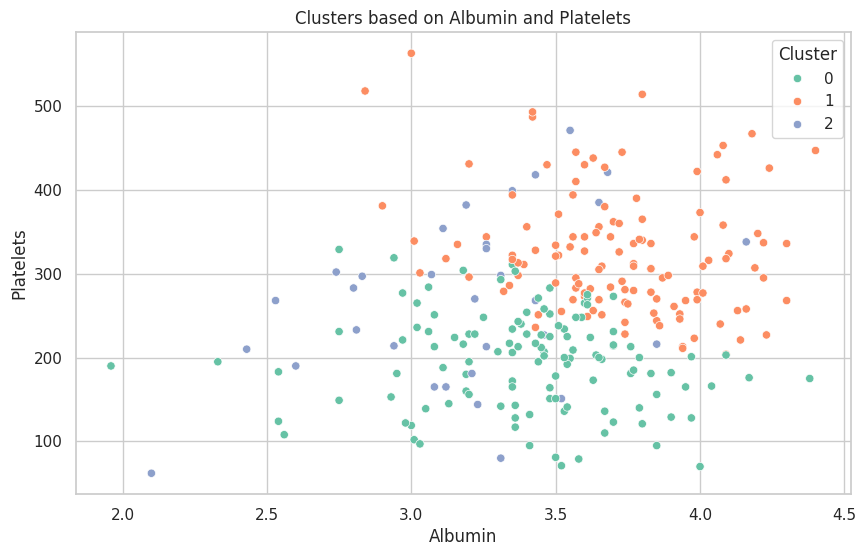

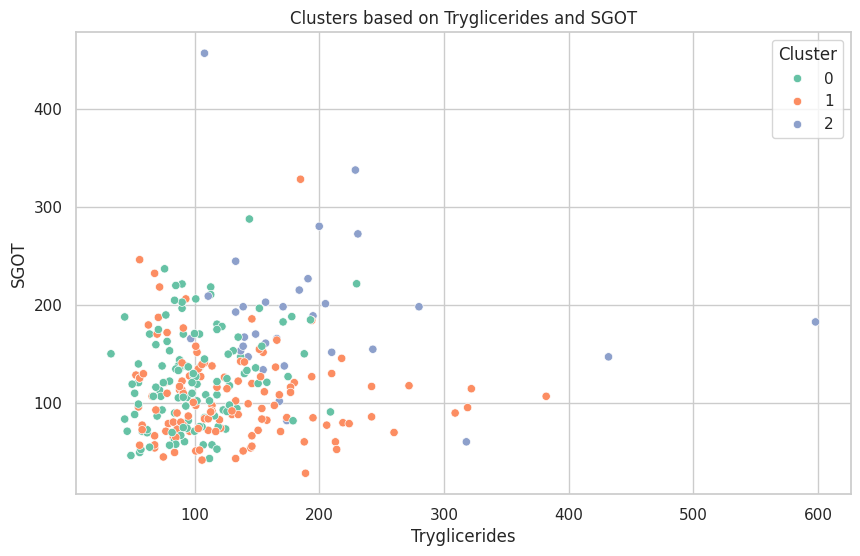

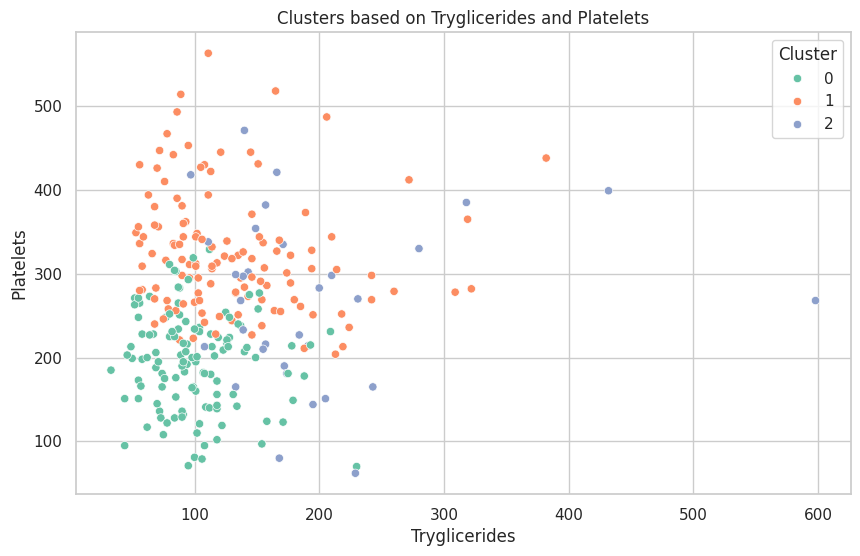

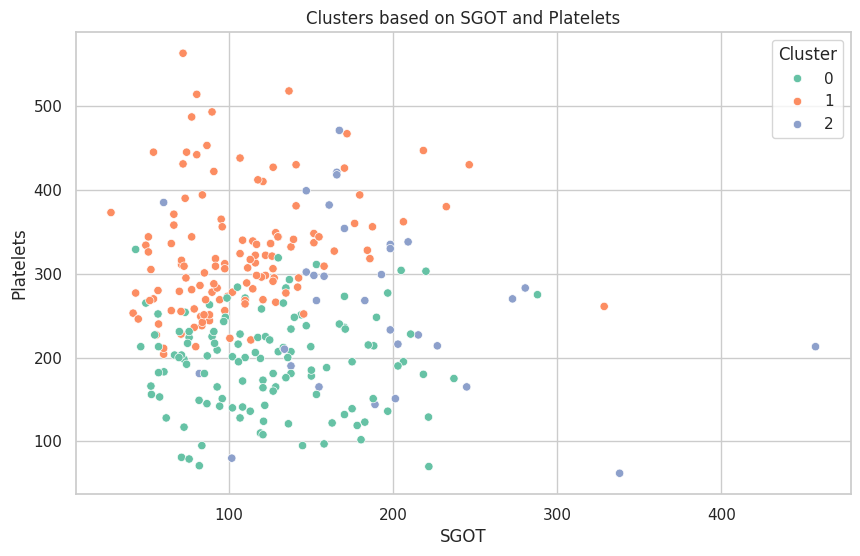

Cluster Centroids (Original Scale):
    Cholesterol  Bilirubin   Albumin  Tryglicerides        SGOT   Platelets
0   301.366667   2.265833  3.402833     100.533333  123.976667  194.741667
1   338.967742   1.770968  3.716210     130.362903  107.334758  325.088710
2   758.500000  13.393750  3.171562     195.781250  189.693750  267.781250

Cluster Analysis by Categorical Variables:
            Status      Drug       Sex   Ascites  Hepatomegaly   Spiders  \
Cluster                                                                   
0        0.850000  0.491667  0.133333  0.083333      0.583333  0.333333   
1        0.653226  0.500000  0.137097  0.000000      0.370968  0.185484   
2        1.781250  0.593750  0.031250  0.281250      0.812500  0.531250   

            Edema  
Cluster            
0        0.258333  
1        0.056452  
2        0.656250  


In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# List of continuous variables to explore as x and y
feature_pairs = ['Cholesterol', 'Bilirubin', 'Albumin', 'Tryglicerides', 'SGOT', 'Platelets']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cirrhosis_df[feature_pairs])

# Use Elbow method to determine optimal number of clusters (k)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Optimal k (choose based on the elbow plot, for this example we assume k=3)
optimal_k = 3

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cirrhosis_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Loop through pairs of features to plot clusters
combinations = list(itertools.combinations(feature_pairs, 2))

for x, y in combinations:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cirrhosis_df[x], y=cirrhosis_df[y], hue=cirrhosis_df['Cluster'], palette='Set2')
    plt.title(f'Clusters based on {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Analyze the cluster centroids to interpret the defining traits of each cluster
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_pairs)
print("Cluster Centroids (Original Scale):\n", cluster_centroids)

# Explore how categorical variables like smoking vary across clusters
cluster_analysis = cirrhosis_df.groupby('Cluster')[categorical_columns].mean()
print("\nCluster Analysis by Categorical Variables:\n", cluster_analysis)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

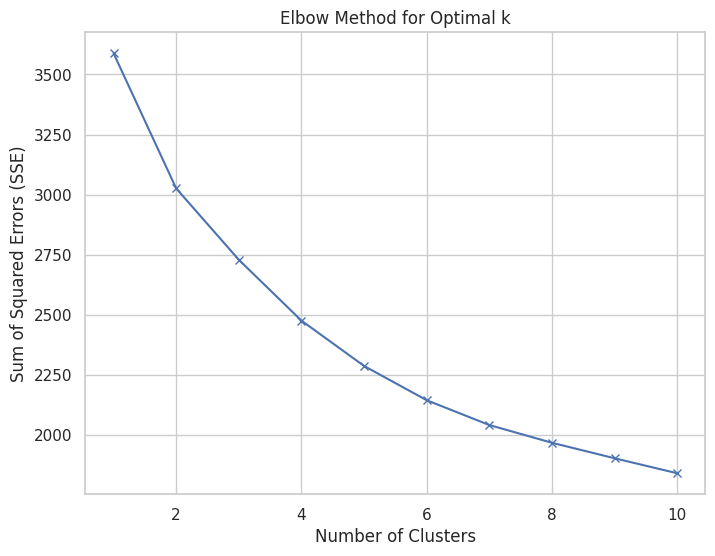

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-31-821f56e8c717>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)


Cluster centroids:
            ID       N_Days           Age  Bilirubin  Cholesterol   Albumin  \
0   74.776471  3202.317647  18124.988235   1.457647   324.223529  3.678706   
1  130.507692   893.200000  19567.169231   8.715385   525.984615  3.212154   
2  229.674603  1714.246032  17521.936508   1.823016   323.174603  3.564762   

       Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  \
0   73.211765  2928.449412  113.196118     115.200000  286.352941   
1  194.215385  2218.455385  159.482923     155.138462  237.215385   
2   71.150794  1253.547619  113.244841     116.015873  257.857143   

   Prothrombin     Stage  
0    10.945882  2.647059  
1    11.456923  3.661538  
2    10.221429  2.984127  


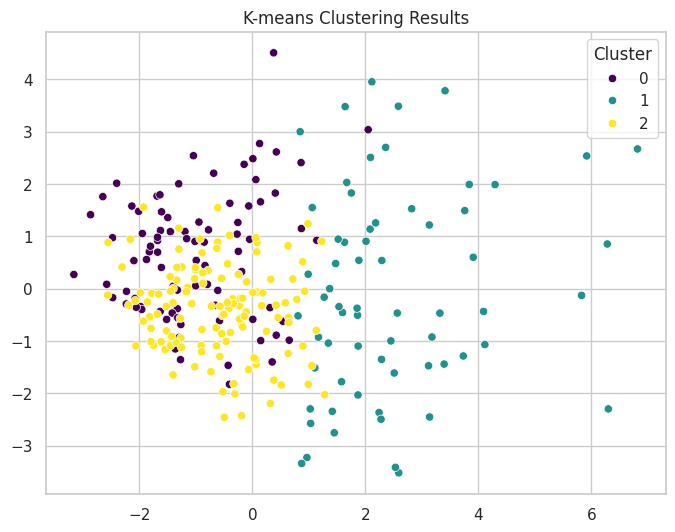

Distribution of Status across clusters:
Cluster   0   1   2
Status             
C        48   6  93
CL        4   3  11
D        33  56  22 

Distribution of Drug across clusters:
Cluster           0   1   2
Drug                       
D-penicillamine  42  31  63
Placebo          43  34  63 

Distribution of Sex across clusters:
Cluster   0   1    2
Sex                 
F        73  54  115
M        12  11   11 

Distribution of Ascites across clusters:
Cluster   0   1    2
Ascites             
N        84  49  124
Y         1  16    2 

Distribution of Hepatomegaly across clusters:
Cluster        0   1   2
Hepatomegaly            
N             55  11  68
Y             30  54  58 

Distribution of Spiders across clusters:
Cluster   0   1   2
Spiders            
N        71  29  96
Y        14  36  30 

Distribution of Edema across clusters:
Cluster   0   1    2
Edema               
N        76  40  118
S         8  10    7
Y         1  15    1 



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your file path
# If you're in Google Colab, you can upload your file using the code below:
# from google.colab import files
# uploaded = files.upload()
# data = pd.read_csv('your_file.csv')

data = pd.read_csv('cirrhosis.csv')

# Display basic info and first few rows
print(data.info())
print(data.head())

# Handle missing values
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()

# Option 2: Fill missing values with mean or median
# data_filled = data.fillna(data.mean())

# Standardize the numerical data
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[numerical_columns])

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
# Suppose we choose k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze cluster centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=numerical_columns)
print("Cluster centroids:\n", centroids_df)

# Visualize the clusters (using first two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data_cleaned['Cluster'], palette='viridis')
plt.title('K-means Clustering Results')
plt.show()

# Optional: Analyze how categorical variables vary across clusters
# You can use groupby or crosstab to evaluate this
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Distribution of {col} across clusters:")
    print(pd.crosstab(data_cleaned[col], data_cleaned['Cluster']), "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-38-d0aa2f869034>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[f'Cluster_{k}'] = kmeans.fit_predict(data_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-38-d0aa2f869034>:30: SettingWithCopyWarning: 
A valu

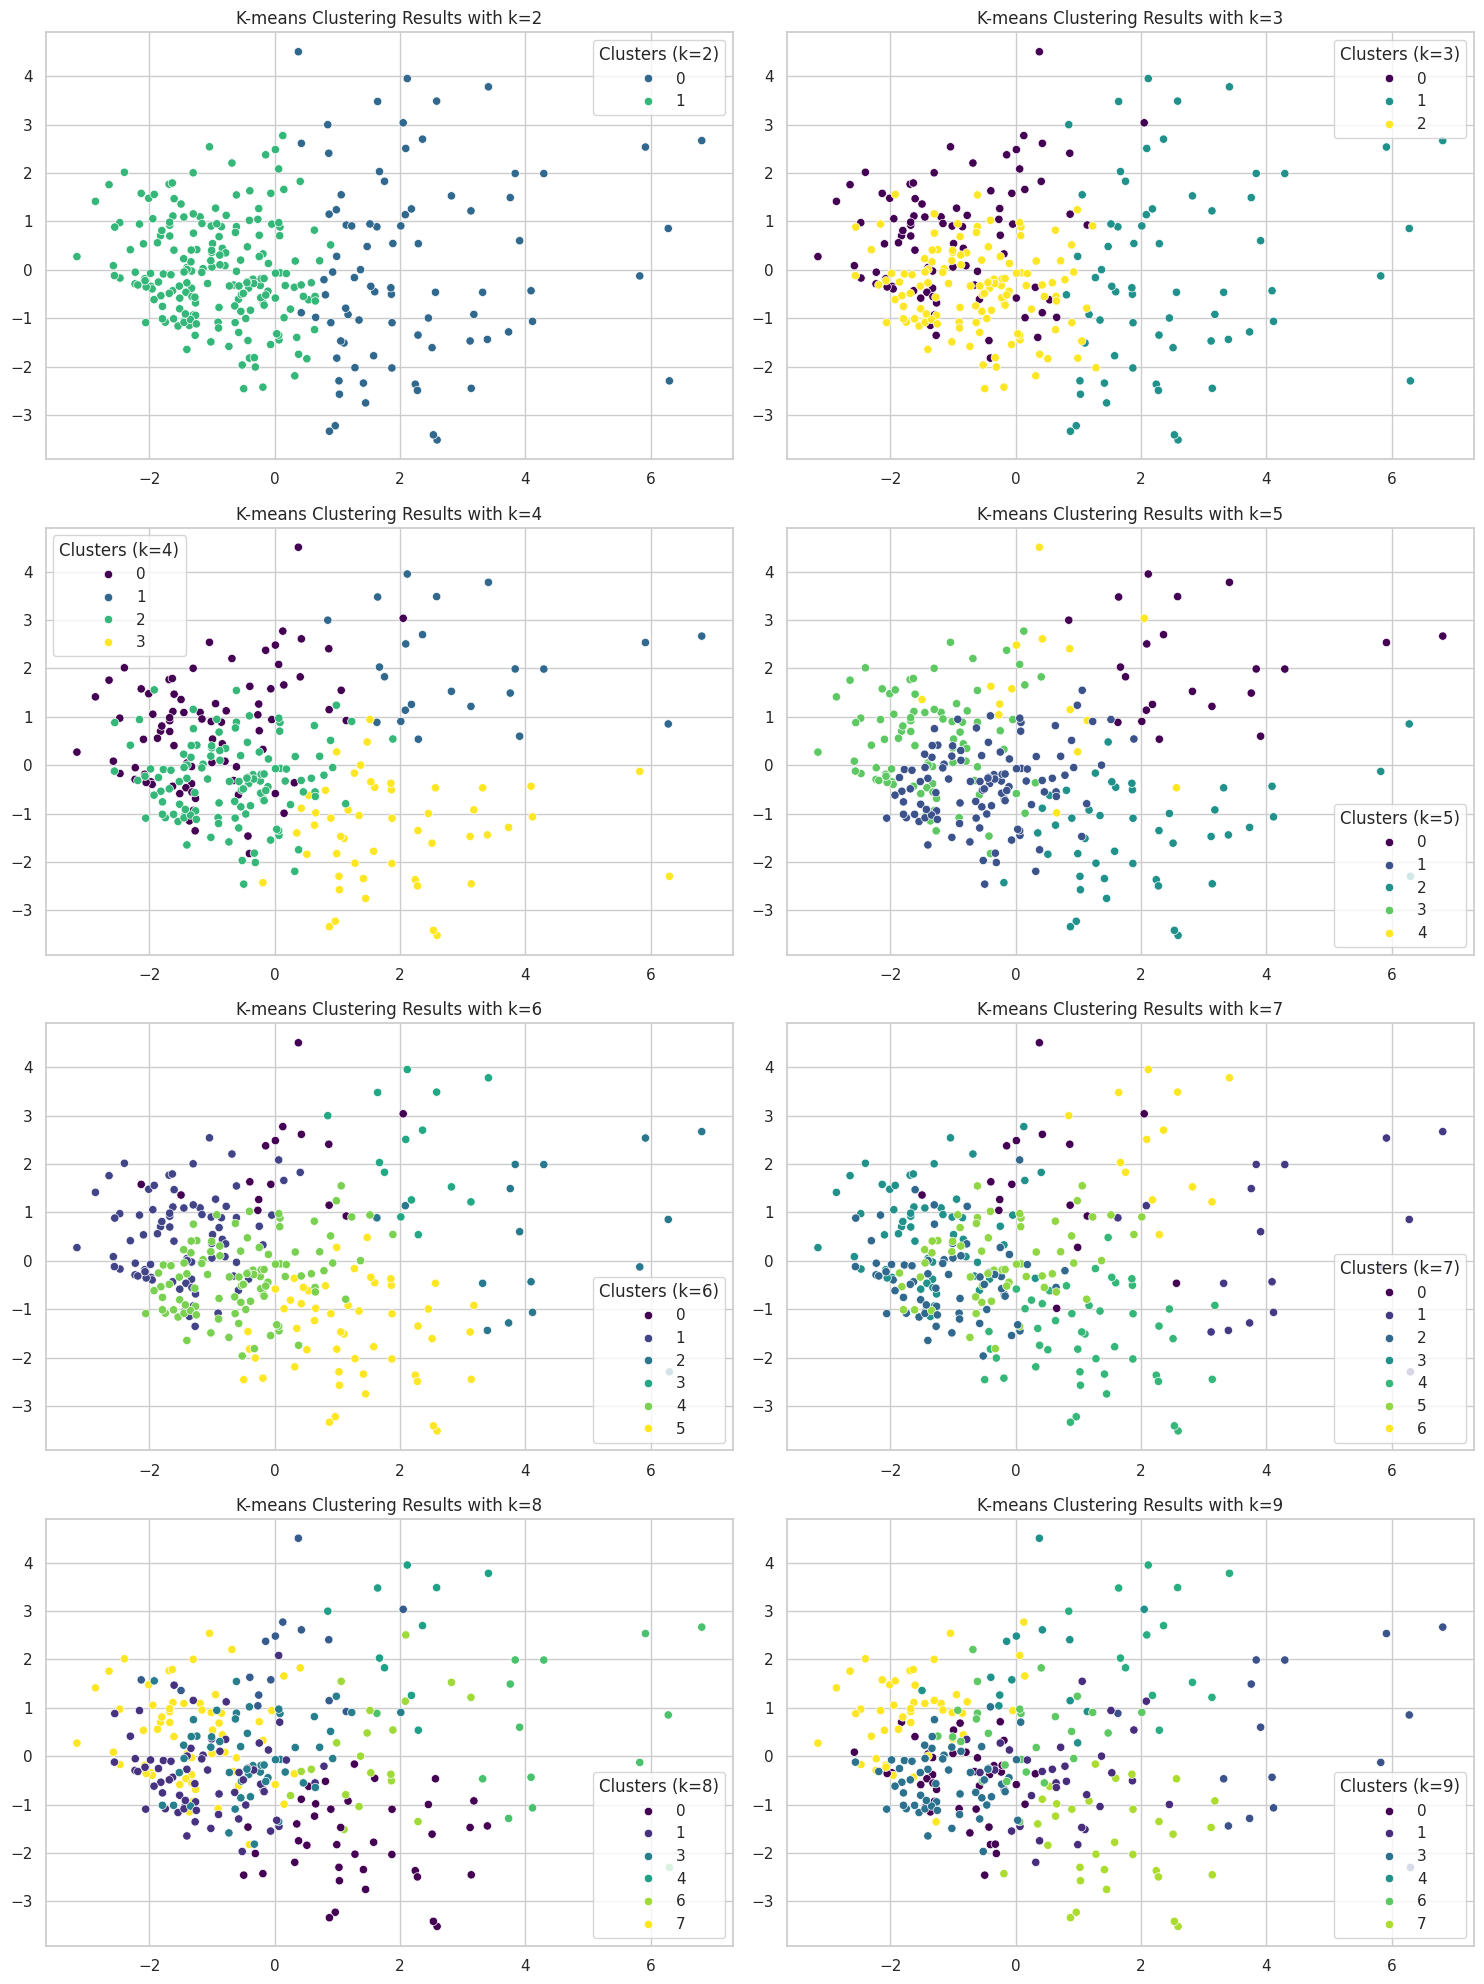

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset (adjust the file path as needed)
data = pd.read_csv('cirrhosis.csv')

# Data Cleaning: Drop rows with missing values
data_cleaned = data.dropna()

# Standardize the numerical data
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[numerical_columns])

# Define the range of k values to try
k_values = range(2, 10)

# Prepare a subplot grid
fig, axes = plt.subplots(len(k_values) // 2, 2, figsize=(15, 20))
axes = axes.flatten()

# Loop through the k values and perform K-means clustering
for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_cleaned[f'Cluster_{k}'] = kmeans.fit_predict(data_scaled)

    # Reduce the dimensions for visualization
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data_scaled)

    # Plot the results
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                    hue=data_cleaned[f'Cluster_{k}'], palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'K-means Clustering Results with k={k}')
    axes[idx].legend(title=f'Clusters (k={k})')

# Show the plots
plt.tight_layout()
plt.show()
